In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
data=pd.read_csv('/Users/sujalagrawal/Developer/Algosense/week2/data/train.csv')

In [2]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
data_dev=data[0:1000].T
X_dev=data_dev[1:n]
Y_dev=data_dev[0]
X_dev=X_dev/255
data_train=data[1000:m].T
X_train=data_train[1:n]
Y_train=data_train[0]
X_train=X_train/255
X_train.shape


(784, 41000)

In [3]:
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) -0.5
    W2 = np.random.rand(100, 10) -0.5
    b2 = np.random.rand(100, 1) -0.5
    W3=np.random.rand(10,100) -0.5
    b3=np.random.rand(10,1) -0.5
    return W1, b1, W2, b2,W3,b3

def ReLU(Z):
    return np.maximum(Z,0)
def softmax(z):
    return np.exp(z)/sum(np.exp(z))
def ReLU_deriv(Z):
    return Z>0
def forward_prop(W1, b1, W2, b2,W3,b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3=W3.dot(A2)+b3
    A3=softmax(Z3)
    return Z1, A1, Z2, A2,Z3,A3
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2,Z3,A3, W1, W2,W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2,dW3,db3

def update_params(W1, b1, W2, b2,W3,b3, dW1, db1, dW2, db2,dW3,db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    W3=W3-alpha*dW3
    b3=b3-alpha*db3
    return W1, b1, W2, b2,W3,b3

In [4]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2,W3,b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2,Z3,A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
        dW1, db1, dW2, db2,dW3,db3 = backward_prop(Z1, A1, Z2, A2,Z3,A3 ,W1, W2,W3, X, Y)
        W1, b1, W2, b2,W3,b3 = update_params(W1, b1, W2, b2,W3,b3, dW1, db1, dW2, db2,dW3,db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2,W3,b3

In [5]:
W1, b1, W2, b2,W3,b3 = gradient_descent(X_train, Y_train, 0.10, 5000)


Iteration:  0
[7 0 7 ... 9 7 9] [5 7 2 ... 6 8 2]
0.08336585365853659
Iteration:  10
[7 7 3 ... 0 7 9] [5 7 2 ... 6 8 2]
0.24921951219512195
Iteration:  20
[7 7 3 ... 0 5 0] [5 7 2 ... 6 8 2]
0.4013658536585366
Iteration:  30
[7 7 3 ... 0 5 2] [5 7 2 ... 6 8 2]
0.4780243902439024
Iteration:  40
[5 7 3 ... 0 3 2] [5 7 2 ... 6 8 2]
0.5346585365853659
Iteration:  50
[5 7 2 ... 6 3 6] [5 7 2 ... 6 8 2]
0.5811951219512195
Iteration:  60
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.6185853658536585
Iteration:  70
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.6080487804878049
Iteration:  80
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.6505121951219512
Iteration:  90
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.6671463414634147
Iteration:  100
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.6873902439024391
Iteration:  110
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.7052195121951219
Iteration:  120
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.7215853658536585
Iteration:  130
[5 7 2 ... 6 3 2] [5 7 2 ... 6 8 2]
0.7352926829268293
Iteration:  140

Prediction:  [5]
Label:  5


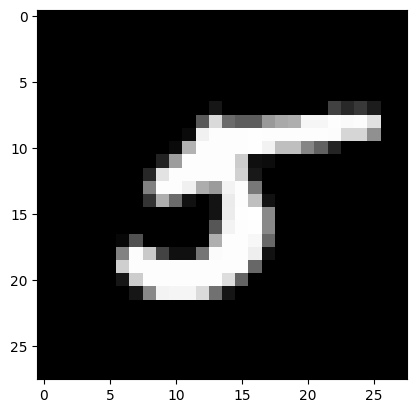

Prediction:  [7]
Label:  7


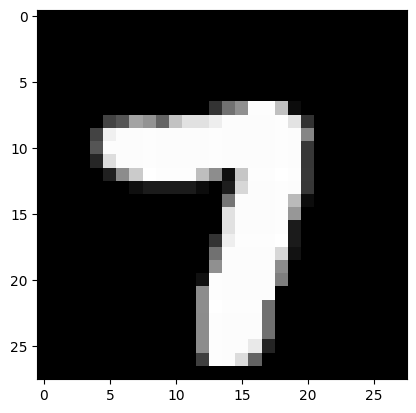

Prediction:  [2]
Label:  2


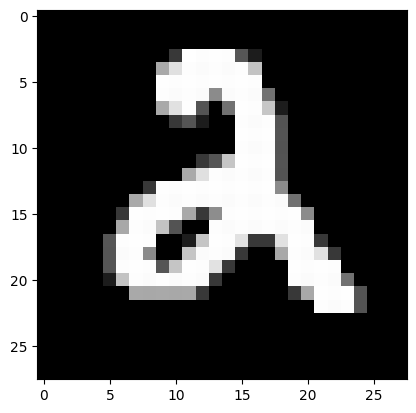

Prediction:  [2]
Label:  2


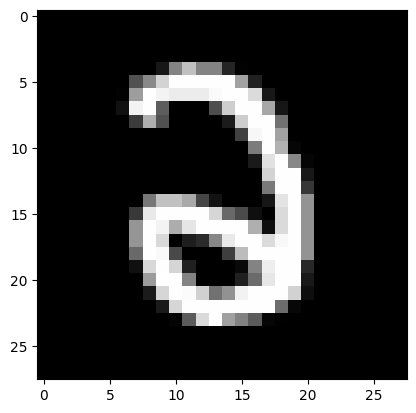

In [6]:
def make_predictions(X, W1, b1, W2, b2,W3,b3):
    _, _, _, _, _,A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
test_prediction(0, W1, b1, W2, b2,W3,b3)
test_prediction(1, W1, b1, W2, b2,W3,b3)
test_prediction(2, W1, b1, W2, b2,W3,b3)
test_prediction(3, W1, b1, W2, b2,W3,b3)


In [7]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2,W3,b3)
get_accuracy(dev_predictions, Y_dev)

[2 7 4 7 9 6 0 7 1 5 7 6 6 3 5 6 9 7 1 9 6 4 9 4 5 6 2 5 5 7 4 8 4 0 7 5 0
 7 5 8 9 8 7 1 1 8 8 6 2 5 4 7 5 8 6 0 1 6 8 4 8 0 4 0 1 0 3 1 8 0 0 7 4 6
 1 5 1 7 7 9 0 1 5 0 5 1 9 8 0 4 7 2 0 0 8 3 9 2 1 7 6 0 0 5 5 0 9 8 2 6 2
 9 5 2 9 4 0 4 5 8 5 5 4 4 2 6 9 5 8 3 4 3 7 6 0 5 4 1 6 4 8 6 1 4 8 3 5 6
 9 7 6 6 4 1 7 4 8 6 8 9 5 3 7 3 9 8 6 6 7 8 2 9 0 9 6 0 2 8 7 3 9 6 7 9 7
 8 2 5 0 8 1 4 0 5 4 6 0 3 7 7 7 5 1 2 8 7 2 6 8 3 1 9 5 4 2 6 3 3 1 6 2 5
 0 8 6 0 4 5 7 2 8 5 5 3 4 8 2 5 2 2 4 4 9 8 0 5 6 9 1 2 5 6 5 7 8 0 6 1 7
 8 8 1 3 1 1 3 9 8 8 7 7 2 2 6 7 7 0 9 2 8 0 0 6 5 7 6 5 3 9 1 4 0 5 6 9 4
 2 6 4 8 8 9 4 9 2 3 0 5 9 3 0 7 0 3 9 3 4 7 0 7 7 8 3 9 5 8 7 6 1 2 7 5 8
 0 2 5 6 6 5 0 7 1 1 9 5 3 4 8 5 3 2 0 3 2 8 9 6 3 4 6 7 5 9 1 2 2 3 6 9 6
 8 0 7 8 9 2 5 0 9 5 7 6 3 8 1 2 9 4 9 7 6 0 8 1 5 9 0 9 4 9 2 7 5 6 2 1 7
 3 4 4 3 6 0 1 7 4 3 2 9 2 9 9 0 1 3 2 7 6 2 0 8 8 1 1 3 4 5 0 2 2 3 1 8 4
 8 2 4 9 7 3 6 2 0 4 9 8 6 7 2 1 6 0 4 7 4 0 9 1 8 2 6 7 3 6 2 8 4 7 5 8 0
 3 7 1 5 8 4 2 0 7 2 4 7 

0.937